# Field Plate Gasket Material Outgassing Tests

In [2]:
import sys
sys.path.append('./code')
sys.path.append('../DatabaseAccess/code')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
from mass_spectra import MassSpectrumLibrary, MassSpectrum
from database_access import DatabaseAccess
import pandas as pd
import numpy as np
from datetime import datetime

Import my standard mass spectrum library:

In [3]:
path = './library/'
lib = MassSpectrumLibrary(path)

Here, I am grabbing the pressure reading in the dump region vacuum chamber while I was doing these outgassing tests. The dump region is a clean vacuum chamber, and suitable for outgassing tests with low risk materials (materials that won't certainly result in residues that will worsen the vacuum), however, the turbo pump on that chamber does not have a break and takes hours to spin down. In order to perform a series of outgassing tests without spinning down the turbo, I connected the outgassing test rig to the dump region with a valve between the two. Here is the outgassing test procedure.

 - I would slowly opened the valve each time that I needed pump out the outgassing test module. 
 - There would be a momentary spike in pressure up to around 100 mtorr, and then would pump down to around a microtorr. 
 - I would then let the system approach a steady state pressure, and I would take an RGA spectrum.
 - I would then turn on a heating coil wrapped only around the outgassing test module. I would heat this module to 110C, which is the same temperature to which we previously baked the interaction region, and I would take a second RGA spectrum.
 - Then I would close the valve to the outgassing test rig and then replace the material of interest.
 
 I performed this test with:
 0. A background with nothing in the chamber.
 1. 2 KF25 viton centering rings. (3/10 16:00)
 2. 4 Virgin Viton strips. (3/10 17:00)
 3. 3 Squishy Teflon strips. (3/10 17:20)
 4. 5 Buna strips. (3/10 17:40)
 5. Attempted anoth background, but couldnt get below 10 microtorr, and so abandonned the tests. (3/10 18:30)
 
 Here is a picture of the set-up:
 ![outgassing set-up](./photos/baking_set-up.jpg)
 
 Here is the profile of the pressure within the outgassing set-up while it was being performed.

please enter the database password: ········
LoggingConfigSQL connection open
LoggingLogData connection open
master connection open
database connection closed


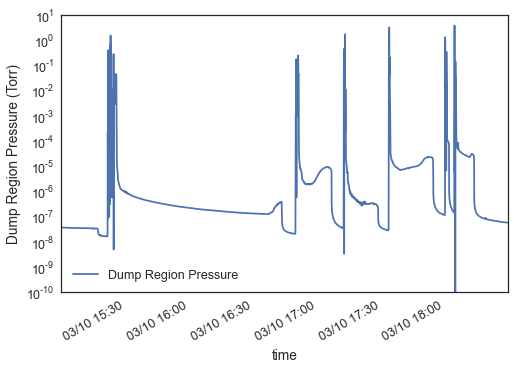

In [23]:
db = DatabaseAccess()
ts = db.get_data(channel='Dump Region Pressure', duration='3.5 hours',
                 end_time=datetime(2016,3,10,18,30))
ts.plot()
plt.yscale('log')
db.close()

Here is a background trace taken with the electron multiplier on. Note that the pressure scale is off - the total pressure in this instance is around $5\times10^{-8}$ torr, though the scale indicates that the water is at $10^{-3}$ torr. Based on this scan, it looks like the gas composition in the dump region is:

- primarily water (~$10^{-7}$ torr level)
- low level of air (~$10^{-9}$ torr level)
- even lower level of various hydrocarbons and fluorocarbons (~$10^{-10}$ torr level and below)

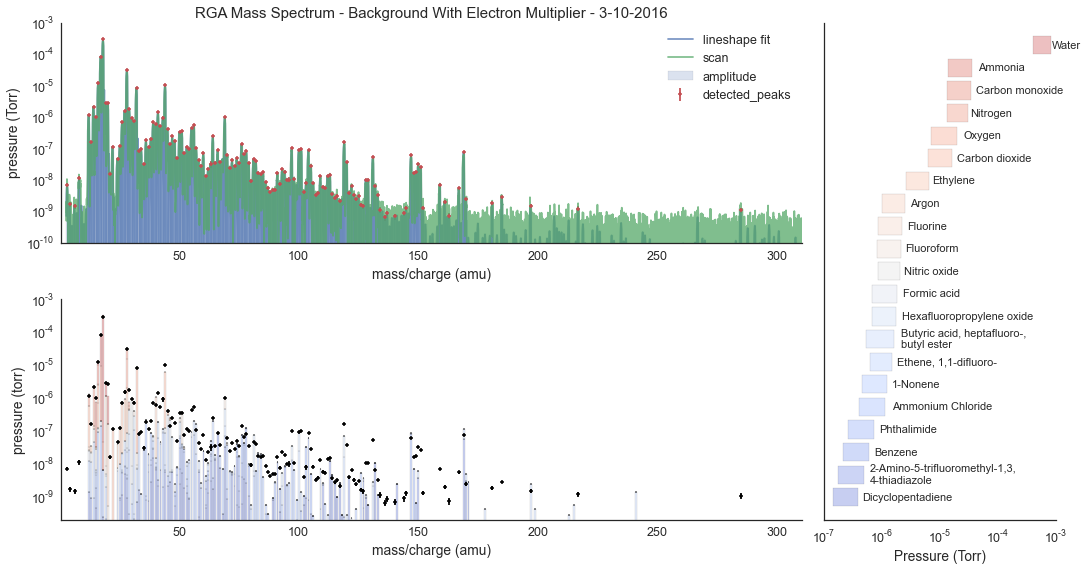

In [114]:
directory = './data/RGA Outgassing Tests/'
filename  = 'Background With Electron Multiplier - 3-10-2016.xml'
ms0 = MassSpectrum(directory + filename, library=lib, fit_method='one')
plt.figure(figsize=(15,8))
ms0.print_report()

At the high end of the mass range, the largest peaks have assignments that light up decently with Hexafluoropropylene oxide, Phthalimide, and Benzene, though it is not clear that these peaks arise from any of these compounds or relatives of those compounds. Nevertheless, these probably result from fluoro or hydrocarbons with rings.

In [115]:
table = ms0.peak_assignments()
table[table['mass (amu)'] > 75].sort_values(by='pressure (torr)', ascending=False).head(10)

,mass (amu),model error (%),pressure (torr),primary component,secondary component
107,119,56.887888,1.588357e-07,Hexafluoropropylene oxide,"Butyric acid, heptafluoro-, butyl ester"
66,76,44.658908,1.365384e-07,Phthalimide,Benzene
87,97,65.636555,1.013546e-07,Hexafluoropropylene oxide,1-Nonene
90,101,98.634562,9.909714e-08,"Butyric acid, heptafluoro-, butyl ester",Phthalimide
89,100,5.594957,9.225203e-08,Hexafluoropropylene oxide,"Butyric acid, heptafluoro-, butyl ester"
93,104,33.319920,8.807177e-08,Phthalimide,Dicyclopentadiene
68,78,49.427586,8.216201e-08,Benzene,Hexafluoropropylene oxide
137,169,49.617963,7.472837e-08,"2-Amino-5-trifluoromethyl-1,3,4-thiadiazole","Butyric acid, heptafluoro-, butyl ester"
67,77,35.119105,6.608202e-08,Benzene,Phthalimide
127,147,43.234154,6.056173e-08,Phthalimide,Hexafluoropropylene oxide


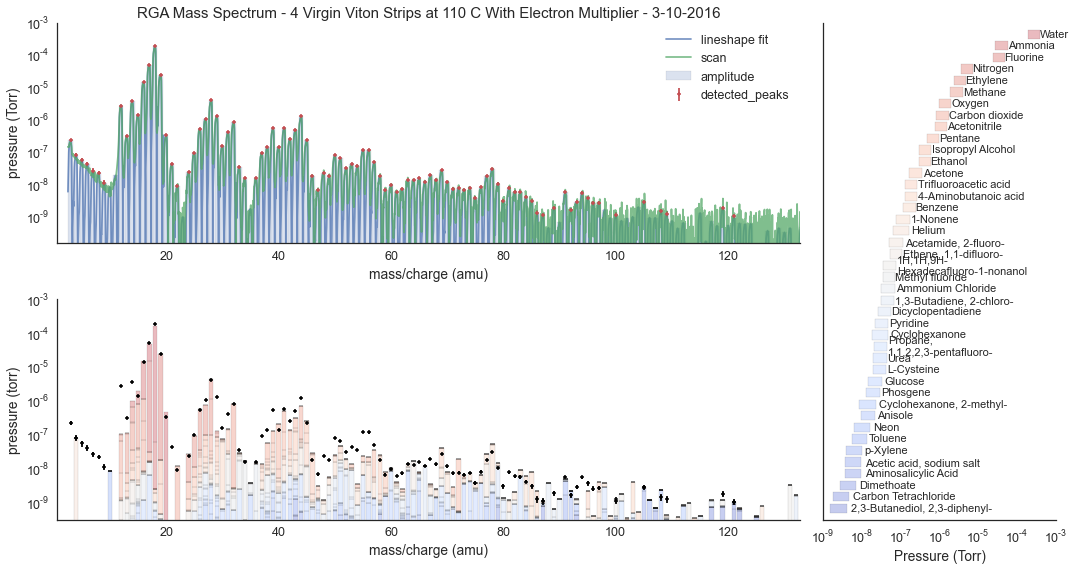

In [118]:
filename  = '4 Virgin Viton Strips at 110 C With Electron Multiplier - 3-10-2016.xml'
ms_viton = MassSpectrum(directory + filename, library=lib, fit_method='one', renormalize_error=False)
plt.figure(figsize=(15,8))
ms_viton.print_report()

In [119]:
table = ms_viton.peak_assignments()
table[table['mass (amu)'] > 50].sort_values(by='pressure (torr)', ascending=False).head(10)

,mass (amu),model error (%),pressure (torr),primary component,secondary component
48,55,79.483000,1.193187e-07,1-Nonene,Pentane
49,56,81.541809,1.187130e-07,1-Nonene,Pentane
44,51,27.467636,6.684264e-08,Trifluoroacetic acid,Benzene
50,57,29.510408,4.968409e-08,Pentane,1-Nonene
46,53,68.789494,4.466561e-08,"1,3-Butadiene, 2-chloro-",Pentane
47,54,89.927011,3.639849e-08,1-Nonene,Pentane
45,52,36.885381,3.190311e-08,Benzene,Pyridine
71,78,68.545020,3.118515e-08,Benzene,Anisole
62,69,47.742585,2.807031e-08,Trifluoroacetic acid,1-Nonene
60,67,81.817523,1.943059e-08,1-Nonene,Dicyclopentadiene


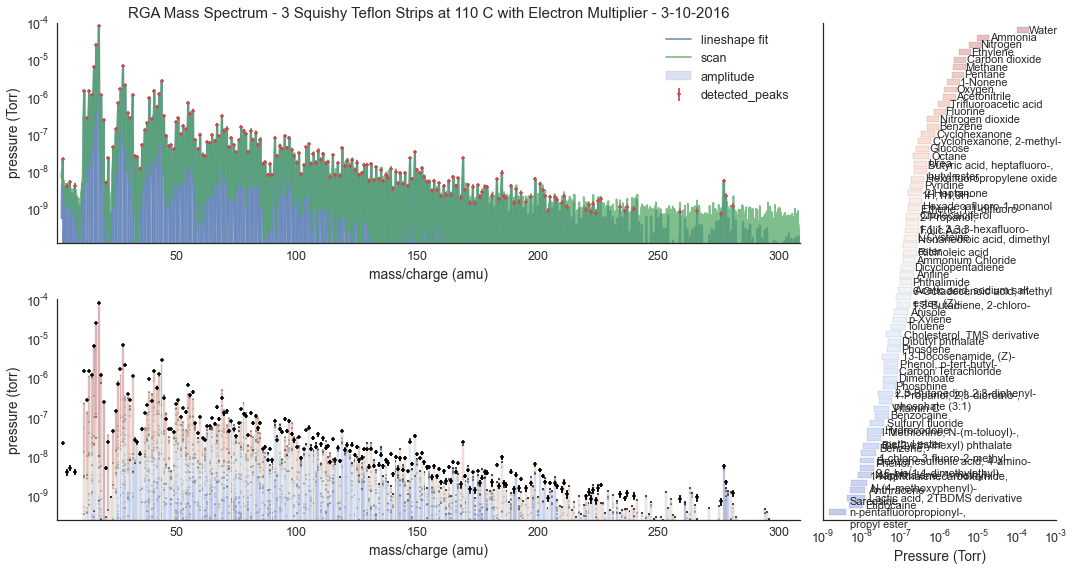

In [120]:
filename  = '3 Squishy Teflon Strips at 110 C with Electron Multiplier - 3-10-2016.xml'
ms_teflon = MassSpectrum(directory + filename, library=lib, fit_method='one', renormalize_error=False)
plt.figure(figsize=(15,8))
ms_teflon.print_report()

In [121]:
table = ms_teflon.peak_assignments()
table[table['mass (amu)'] > 155].sort_values(by='pressure (torr)', ascending=False).head(10)

,mass (amu),model error (%),pressure (torr),primary component,secondary component
160,169,15.947773,2.399480e-08,"Butyric acid, heptafluoro-, butyl ester",Cholecalciferol
174,185,24.155915,9.649211e-09,"Nonanedioic acid, dimethyl ester",Cholecalciferol
156,165,28.168527,7.389394e-09,Benzocaine,Hydrocodone
158,167,46.180075,6.784138e-09,Bis(2-ethylhexyl) phthalate,Ricinoleic acid
184,199,9.993307,6.484826e-09,"1-Propanol, 2,3-dibromo-, phosphate (3:1)",Cholecalciferol
172,183,63.448236,6.306349e-09,Cholecalciferol,Folic Acid
148,157,2.718779,5.692544e-09,Cholecalciferol,"1-Propanol, 2,3-dibromo-, phosphate (3:1)"
209,277,7.269533,5.688080e-09,Etidocaine,"1-Naphthalenecarboxamide, N-(4-methoxyphenyl)-"
154,163,50.078042,5.571245e-09,"1H,1H,9H-Hexadecafluoro-1-nonanol","Cholesterol, TMS derivative"
150,159,3.481662,5.002847e-09,Cholecalciferol,"Cholesterol, TMS derivative"


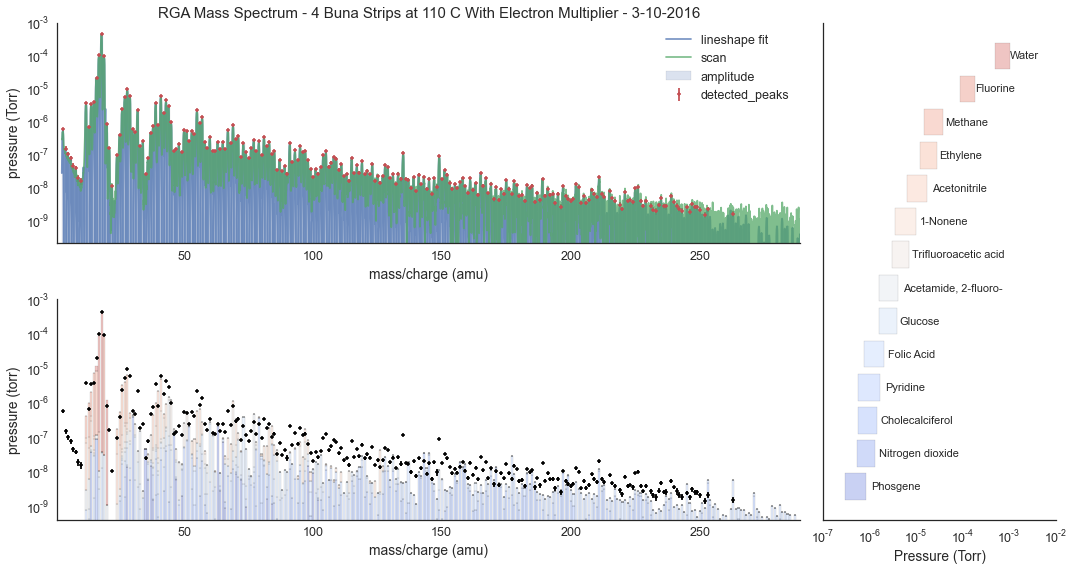

In [40]:
filename  = '4 Buna Strips at 110 C With Electron Multiplier - 3-10-2016.xml'
ms_buna = MassSpectrum(directory + filename, library=lib, fit_method='one')
plt.figure(figsize=(15,8))
ms_buna.print_report()

In [48]:
table = ms_buna.peak_assignments()
table[table['mass (amu)'] > 125].sort_values(by='pressure (torr)', ascending=False).head(10)

,mass (amu),model error (%),pressure (torr),primary component,secondary component
130,135,95.872028,1.144892e-07,Folic Acid,Cholecalciferol
144,149,87.032340,9.031915e-08,Glucose,Folic Acid
123,128,43.646699,4.851397e-08,Folic Acid,Cholecalciferol
124,129,66.433374,4.296360e-08,Cholecalciferol,Folic Acid
146,151,90.746422,3.311150e-08,Folic Acid,Cholecalciferol
160,165,84.576898,2.682528e-08,Cholecalciferol,Folic Acid
128,133,54.469515,2.633268e-08,Glucose,Cholecalciferol
126,131,16.742186,2.595505e-08,Glucose,Cholecalciferol
147,152,88.611815,2.458225e-08,Folic Acid,Cholecalciferol
136,141,59.948120,2.457889e-08,Cholecalciferol,Folic Acid


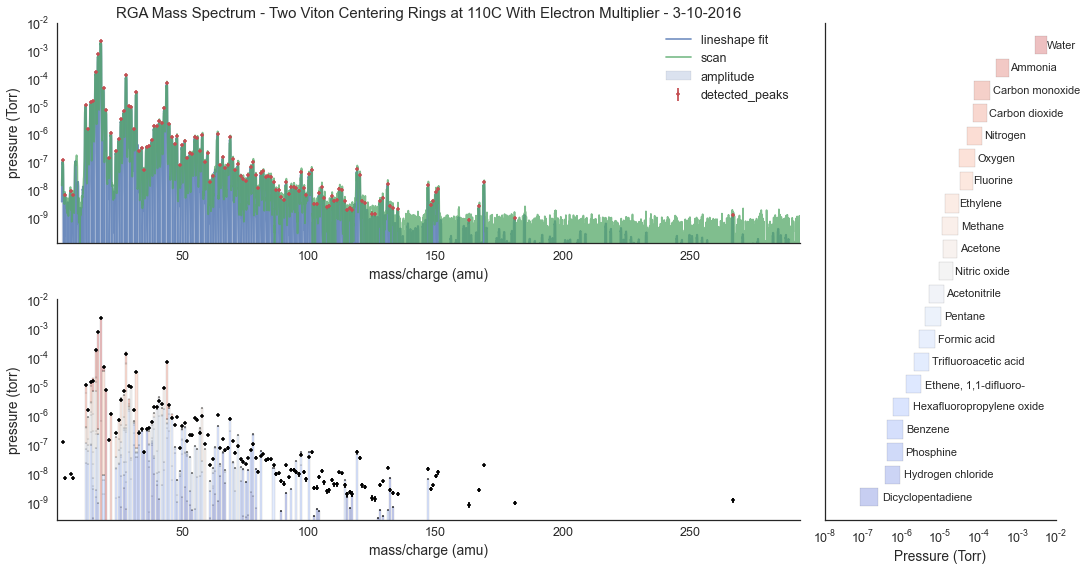

In [42]:
filename  = 'Two Viton Centering Rings at 110C With Electron Multiplier - 3-10-2016.xml'
ms_ring = MassSpectrum(directory + filename, library=lib, fit_method='one')
plt.figure(figsize=(15,8))
ms_ring.print_report()

In [43]:
table = ms_ring.peak_assignments()
table[table['mass (amu)'] > 100].sort_values(by='pressure (torr)', ascending=False).head(10)

,mass (amu),model error (%),pressure (torr),primary component,secondary component
108,119,16.395763,5.610157e-08,Hexafluoropropylene oxide,None
91,101,99.840325,5.430382e-08,Dicyclopentadiene,None
109,120,100.000000,3.480521e-08,None,None
127,169,100.000000,1.899225e-08,None,None
116,131,96.464976,1.597612e-08,Hexafluoropropylene oxide,None
120,147,55.996061,1.475944e-08,Hexafluoropropylene oxide,None
95,105,98.522401,1.242692e-08,Dicyclopentadiene,None
102,112,100.000000,1.109745e-08,None,None
124,151,100.000000,1.092038e-08,None,None
103,113,99.749077,1.016361e-08,Dicyclopentadiene,None


#### Some notes on some of the possible compounds in vacuum:

1. [**Nonene**](https://en.wikipedia.org/wiki/Nonene) (or Nonen-3-ol) - precursor to producing some detergents.
2. [**Hexafluoropropylene oxide**](https://en.wikipedia.org/wiki/Hexafluoropropylene_oxide) - a monomer of some fluoropolymers such as **Viton** and a gaseous precursor to some lubricants. Also [characteristic of teflon outgassing](https://books.google.com/books?id=N7Bu7etypTAC&pg=PA668&lpg=PA668&dq=Hexafluoropropylene+oxide+outgassing&source=bl&o\
ts=aBvK85vSja&sig=vg3P8ELkgZLmuMIQ0jXTA8FMS8s&hl=en&sa=X&ved=0ahUKEwjUyojN_sDLAhXKVT4KH\
RAaBd0Q6AEINDAD#v=onepage&q=Hexafluoropropylene%20oxide%20outgassing&f=false).
3. [**DifluoroEthene**](https://en.wikipedia.org/wiki/1,1-Difluoroethylene) - a precursor to creating [Polyvinylidene fluoride](https://en.wikipedia.org/wiki/Polyvinylidene_fluoride), the other dominant component of **Viton** and characteristic of some other fluoropolymers.
4. [**Acetonitrile**](https://en.wikipedia.org/wiki/Acrylonitrile) - precursor to making [butadiene](https://en.wikipedia.org/wiki/1,3-Butadiene), or [**Buna**](https://en.wikipedia.org/wiki/Nitrile_rubber), nitrile rubber.

Among those compounds that the algorithm has picked out as possibly being represented in the spectrum, I generally only believe the assignment if there is a plausible reason why that compound might be present in our chamber. In this case, I believe we have:
- **Air**: Nitrogen, Oxygen, Argon, Carbon Dioxide, Nitrogen Dioxide.
- **Solvents and Detergents**: Hexane (and relatives - Pentane, Butane, Propane, Ethane), Ethanol, Isopropanol, Acetone, Water, Ammonia, Nonene.
- **Fluoropolymers**: Fluorine, Hexafluoropropylene Oxide, Difluoroethene
- **Nitrile Rubber**: Acetonitrile
- **Other Oily Stuff**: Methane, Ethylene, Benzene, Carbon Dioxide, Possible Large or Biological Molecules

## Bakeout #2

After having determined that the "virgin viton" obtained from EqualSeal.com passed our outgassing test, I waterjetted new Viton shims for the field plate assembly, cleaned them using the standard vacuum cleaning procedure (but omitting acetone given that viton dissolves in acetone). Then I baked the viton for a full day at 200 C (as recommended by a CERN outgassing document for Viton). Then I reassembled the Gen II field plate assembly with the aluminum baking field plate stand-in pieces, and we baked the interaction region again at about 130 C over the weekend. We baked for about 1 day after which we broke vacuum, and moved the RGA from where it was on the dump region in the outgassin set-up, to the interaction region within line of sight of the field plates so that we could detect condensibles (things that couldn't be able to get around corners in the vacuum chamber).

Here is an initial RGA Scan while the RGA was still around some bends in the outgassing set-up.

C:\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


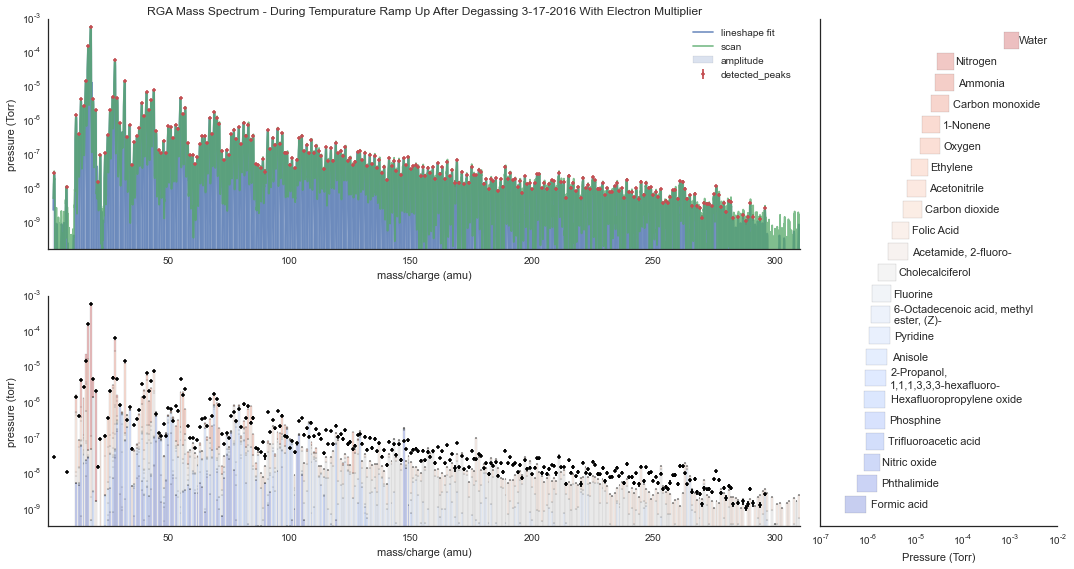

In [107]:
filename  = './data/During Tempurature Ramp Up After Degassing 3-17-2016 With Electron Multiplier.xml'
ms_pre = MassSpectrum(filename, library=lib, fit_method='one')
plt.figure(figsize=(15,8))
ms_pre.print_report()

In [127]:
db = DatabaseAccess()

please enter the database password: ········
LoggingConfigSQL connection open
LoggingLogData connection open
master connection open


Here is the pressure profile in the dump region during the bakeout procedure.

saved: ./data/2016-03-17T14-09_2016-03-21T09-30_Stem_Pressure_Beam_Box_Pressure_Dump_Region_Pressure.pkl


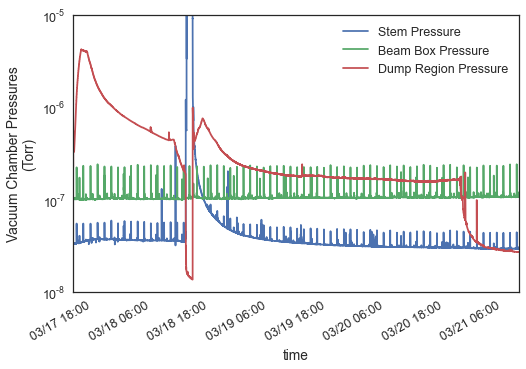

In [137]:
tsa = db.get_data(group='Vacuum Chamber Pressures', duration='4.5 days')
tsa.save()
tsa.plot()
plt.yscale('log')
_=plt.ylim([10**-8, 10**-5])

Here is a mass spectrum taken during baking when the RGA was within line of sight of the field plates. Of particular note here are some small peaks at high mass (around 277 amu). I am fairly convinced that this is due to amino-acid dimers - the library matches a particular one called Etidocaine, which is clearly biological - possibly from fingerprints. The phthalate peak at 149 amu is still detectable, but it is class to the background junk level - much smaller than it was previously when we were generating it.

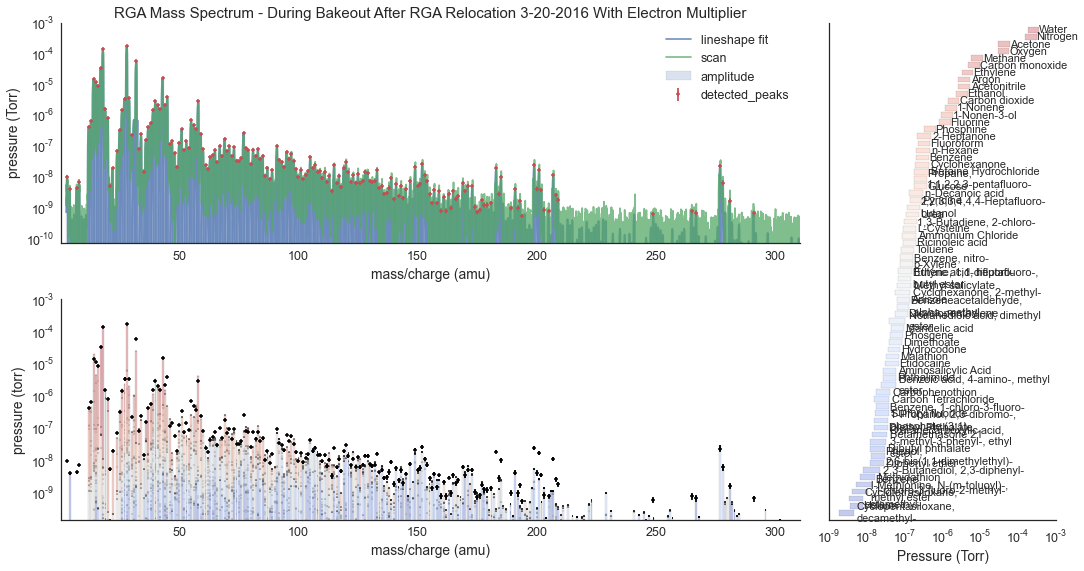

In [6]:
ms_3_20 = MassSpectrum('./data/During Bakeout After RGA Relocation 3-20-2016 With Electron Multiplier.xml',
                       library=lib, fit_method='one', renormalize_error=False)
plt.figure(figsize=(15,8))
ms_3_20.print_report()

Here is a mass spectrum after baking was complete. Water had been reduced below the level of Nitrogen (Nitrogen could have been present due to a known and small leak in the dump region that we knew about and have since corrected).

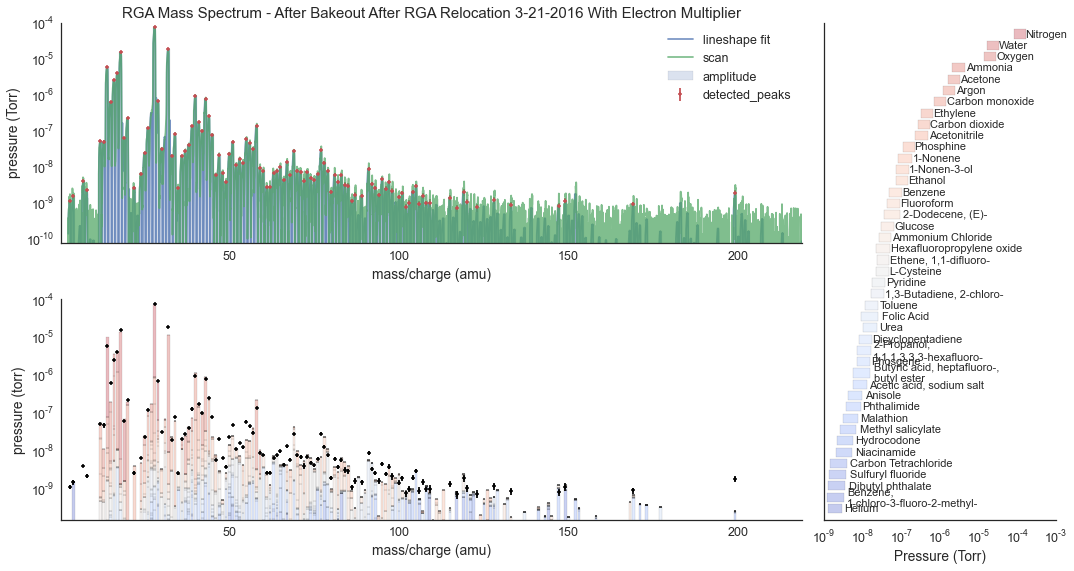

In [146]:
ms_3_20 = MassSpectrum('./data/After Bakeout After RGA Relocation 3-21-2016 With Electron Multiplier.xml',
                       library=lib, fit_method='one', renormalize_error=False)
plt.figure(figsize=(15,8))
ms_3_20.print_report()